In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV

# Data Gathering

In [60]:
df = pd.read_csv('Titanic-Dataset.csv')

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Exploratory Data Analysis

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [67]:
df.shape

(891, 12)

we see that there are a greater number of null values are present in data set. 
and the number we see when null values are drop, it's too much. 

# Handle Missing Values

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [70]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [71]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [72]:
df['Embarked'].fillna('S', inplace=True)

In [73]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [74]:
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)


In [75]:
df=df.dropna()

In [76]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Analysis on data

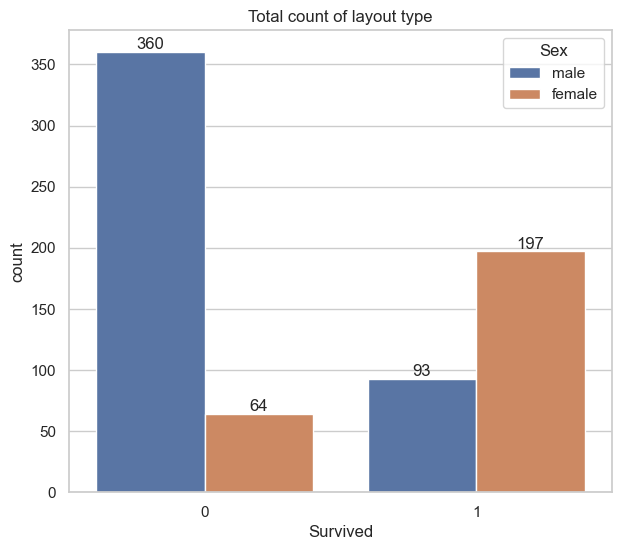

In [79]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.countplot(data=df, x='Survived', hue='Sex', ax=ax)
plt.title('Total count of layout type')

for bar in ax.containers:
    ax.bar_label(bar)

plt.show()

above plot show number of people are survived or not as according to sex (male/female).in which the male is not survived much as compared to female,0 mean not survived and 1 mean survived, and 360 males are not survived, and females are only 93 are not survived. and 64 males are only survived and female are survived is 197

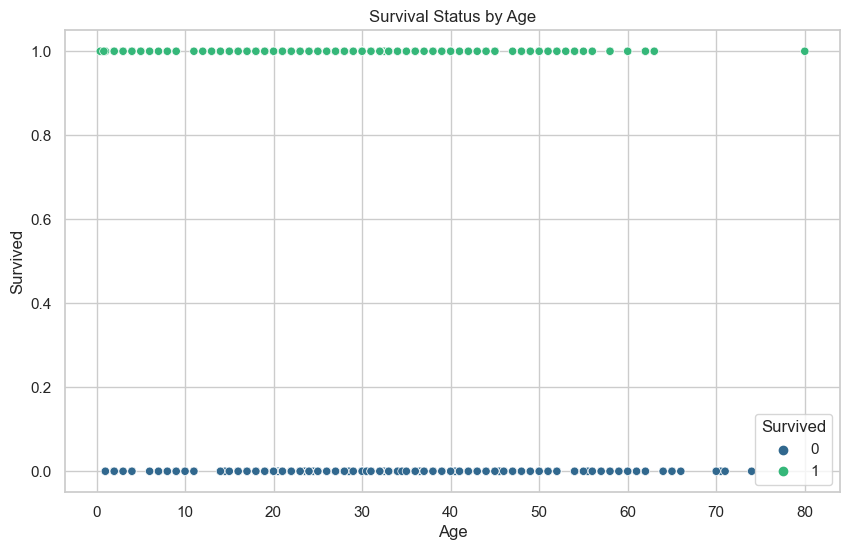

In [80]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Survived', data=df, hue='Survived', palette='viridis')
plt.title('Survival Status by Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

above plot show that how many survived and not survived as according to age.in which only one person has 80 age are survived 

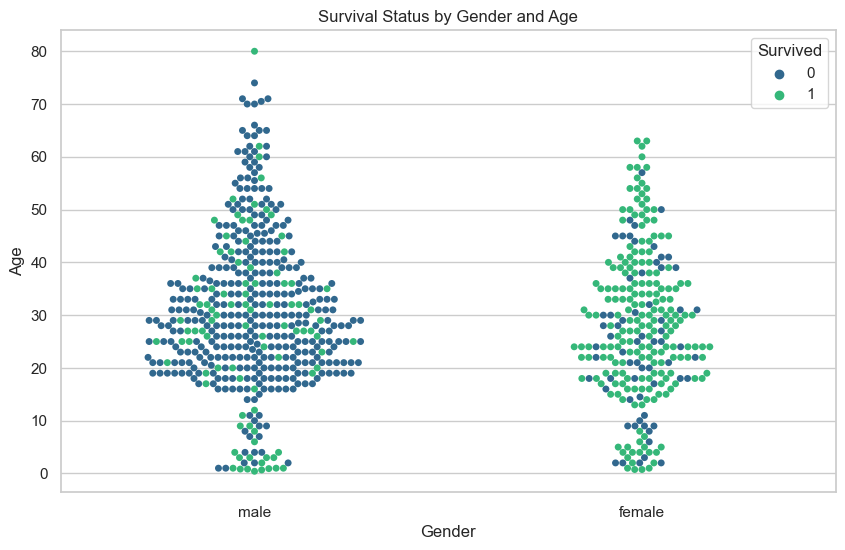

In [81]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Sex', y='Age', hue='Survived', data=df, palette='viridis')
plt.title('Survival Status by Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

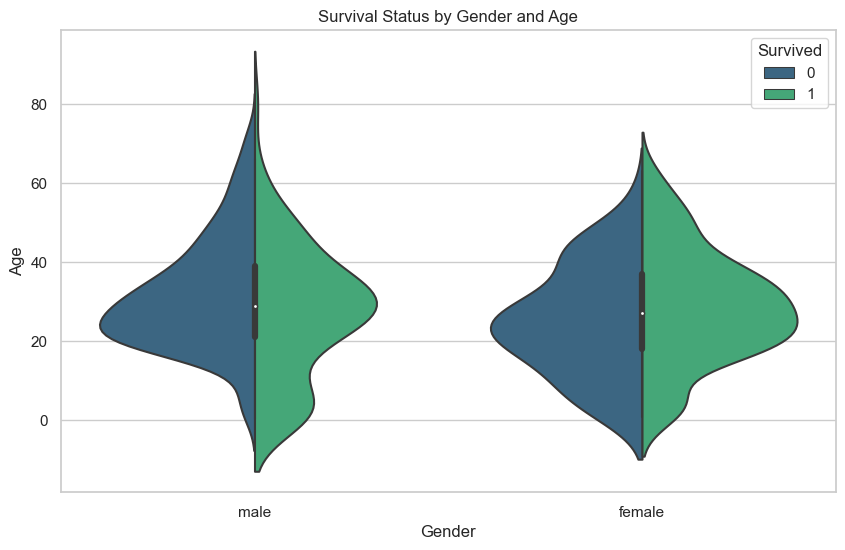

In [82]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette='viridis')
plt.title('Survival Status by Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

above both plots show that how many are survived and not survived as according to both age and sex. and in which only one  male has 80 age are survive.

and also, male who survived, their age is between 10 to 50 and female are which survived, their age between 1 to 50, from second plot. 

C:\Users\raj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


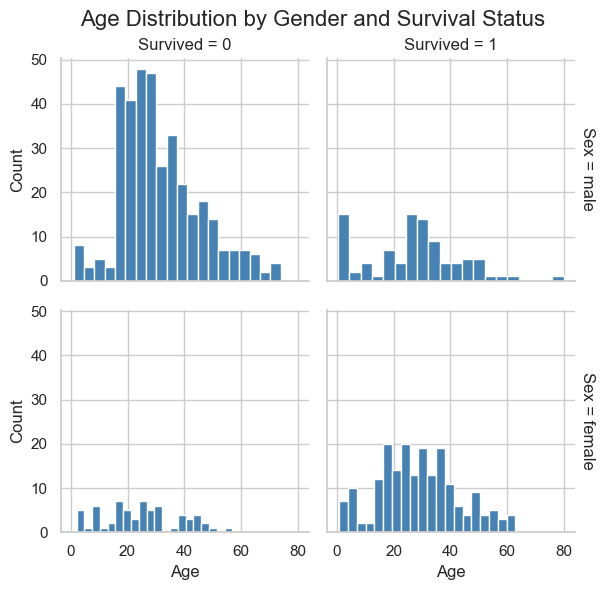

In [83]:
g = sns.FacetGrid(df, col="Survived", row="Sex", margin_titles=True)
g.map(plt.hist, "Age", color="steelblue", bins=20)
g.set_axis_labels("Age", "Count")
plt.suptitle('Age Distribution by Gender and Survival Status', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


above plot also show that the count of survived or not survived as according to age and sex.in which we see that most are male are not survived and their age is between 20 to 40 and female that are survived most, age is between 20 to 40

C:\Users\raj\AppData\Local\Temp\ipykernel_17368\766342519.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[(df['Survived'] == 0) & (df['Sex'] == 'male')]['Age'], label='Male Not Survived', color='red', shade=True)
C:\Users\raj\AppData\Local\Temp\ipykernel_17368\766342519.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'], label='Male Survived', color='blue', shade=True)
C:\Users\raj\AppData\Local\Temp\ipykernel_17368\766342519.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[(df['Survived'] == 0) & (df['Sex'] == 'female')]['Age'], label='Female Not Sur

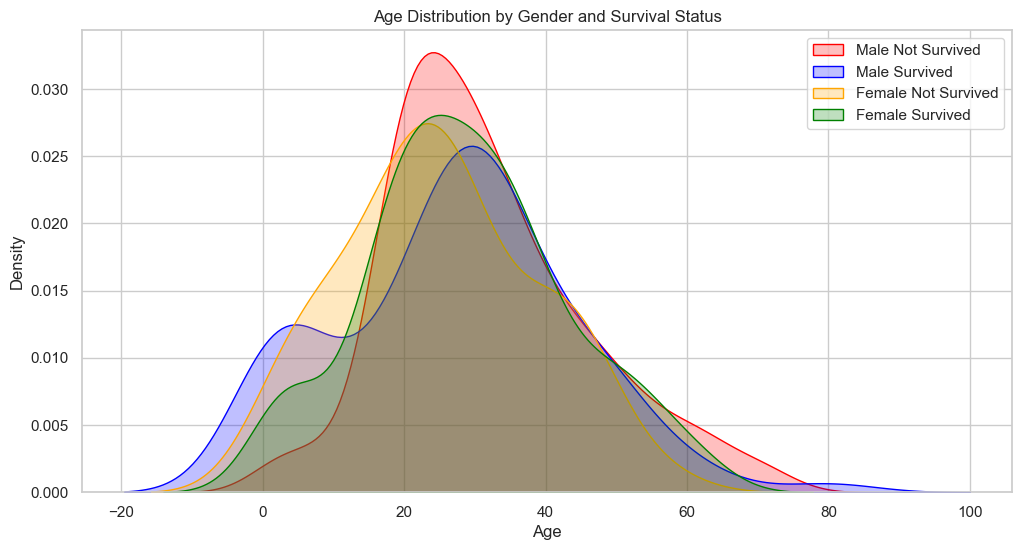

In [84]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[(df['Survived'] == 0) & (df['Sex'] == 'male')]['Age'], label='Male Not Survived', color='red', shade=True)
sns.kdeplot(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'], label='Male Survived', color='blue', shade=True)
sns.kdeplot(df[(df['Survived'] == 0) & (df['Sex'] == 'female')]['Age'], label='Female Not Survived', color='orange', shade=True)
sns.kdeplot(df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['Age'], label='Female Survived', color='green', shade=True)
plt.title('Age Distribution by Gender and Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

above plot show that density of different categories which shows in top left corner of plot

# Now before Train test split, we need to do label encoding for Sex and Embarked

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

C:\Users\raj\AppData\Local\Temp\ipykernel_17368\1455135551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = label_encoder.fit_transform(df['Sex'])
C:\Users\raj\AppData\Local\Temp\ipykernel_17368\1455135551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


In [86]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,1
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [87]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514,1.596639
std,259.119524,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.778238
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,2.000000
50%,445.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700,2.000000
75%,677.750000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


we need feature scaling it's just because Fare max value is too big from above table. 

# Feature scaling on column Fare

In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

df['Fare'] = min_max_scaler.fit_transform(df[['Fare']])

C:\Users\raj\AppData\Local\Temp\ipykernel_17368\2680979731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'] = min_max_scaler.fit_transform(df[['Fare']])


In [89]:
#imputer = SimpleImputer(strategy='mean')
#xnew=imputer.fit_transform(x)


# Train test split

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [91]:
x = df.drop(['Survived','PassengerId'],axis=1)

y=df[["Survived"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Logistic regression

In [92]:
model=LogisticRegression()

In [93]:
model.fit(X_train,y_train)

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [94]:
yp=model.predict(X_test)

In [95]:
cnf_matrix = confusion_matrix(y_test,yp)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_test,yp)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_test , yp)
print('classification_report : \n',clf_report)

confusion matrix :
 [[105  21]
 [ 30  59]]
Accuracy Score :  0.7627906976744186
classification_report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       126
           1       0.74      0.66      0.70        89

    accuracy                           0.76       215
   macro avg       0.76      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215



# For Train

In [96]:
y_pred_train_log = model.predict(X_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_log)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_train,y_pred_train_log)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_train,y_pred_train_log)
print('classification_report : \n',clf_report)


confusion matrix :
 [[262  36]
 [ 52 149]]
Accuracy Score :  0.8236472945891784
classification_report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       298
           1       0.81      0.74      0.77       201

    accuracy                           0.82       499
   macro avg       0.82      0.81      0.81       499
weighted avg       0.82      0.82      0.82       499



# K- Nearest Neighbor

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

C:\Users\raj\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [99]:
y_pred_knn = knn_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test,y_pred_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_knn = accuracy_score(y_test,y_pred_knn)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_test , y_pred_knn)
print('classification_report : \n',clf_report)

confusion matrix :
 [[112  14]
 [ 39  50]]
Accuracy Score :  0.8236472945891784
classification_report : 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       126
           1       0.78      0.56      0.65        89

    accuracy                           0.75       215
   macro avg       0.76      0.73      0.73       215
weighted avg       0.76      0.75      0.74       215



# For Train

In [100]:
y_pred_train_knn = knn_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_knn)
print('confusion matrix :\n',cnf_matrix)

acc_score_LR = accuracy_score(y_train,y_pred_train_knn)
print("Accuracy Score : ",acc_score_LR)

clf_report = classification_report(y_train,y_pred_train_knn)
print('classification_report : \n',clf_report)


confusion matrix :
 [[278  20]
 [ 55 146]]
Accuracy Score :  0.8496993987975952
classification_report : 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       298
           1       0.88      0.73      0.80       201

    accuracy                           0.85       499
   macro avg       0.86      0.83      0.84       499
weighted avg       0.85      0.85      0.85       499



# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred_dt = dt_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test,y_pred_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score_DT = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score : ",acc_score_DT)

clf_report = classification_report(y_test , y_pred_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[99 27]
 [30 59]]
Accuracy Score :  0.7348837209302326
classification_report : 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       126
           1       0.69      0.66      0.67        89

    accuracy                           0.73       215
   macro avg       0.73      0.72      0.73       215
weighted avg       0.73      0.73      0.73       215



# For Train

In [104]:
y_pred_train_dt= dt_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train_dt)
print("Accuracy Score : ",acc_score)

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[298   0]
 [  4 197]]
Accuracy Score :  0.9919839679358717
classification_report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       298
           1       1.00      0.98      0.99       201

    accuracy                           0.99       499
   macro avg       0.99      0.99      0.99       499
weighted avg       0.99      0.99      0.99       499



# by using hyperparameter tuning

In [105]:
dt_model1=DecisionTreeClassifier()
hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10)
        
      
      }
rscv_model = RandomizedSearchCV(dt_model,hyp,random_state=10,cv=5)
rscv_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [106]:
y_pred_dt = rscv_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test,y_pred_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score_DT = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score : ",acc_score_DT)

clf_report = classification_report(y_test , y_pred_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[107  19]
 [ 32  57]]
Accuracy Score :  0.7627906976744186
classification_report : 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       126
           1       0.75      0.64      0.69        89

    accuracy                           0.76       215
   macro avg       0.76      0.74      0.75       215
weighted avg       0.76      0.76      0.76       215



# For Train

In [107]:
y_pred_train_dt= rscv_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion matrix :\n',cnf_matrix)

acc_score = accuracy_score(y_train,y_pred_train_dt)
print("Accuracy Score : ",acc_score)

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report : \n',clf_report)

confusion matrix :
 [[270  28]
 [ 57 144]]
Accuracy Score :  0.8296593186372746
classification_report : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.86       298
           1       0.84      0.72      0.77       201

    accuracy                           0.83       499
   macro avg       0.83      0.81      0.82       499
weighted avg       0.83      0.83      0.83       499



......................................................................................................................................................................................................................

# Conclusion


In conclusion, our analysis of the Titanic dataset using machine learning and exploratory data analysis (EDA) has given us valuable insights into what influenced passenger survival. By employing different machine learning algorithms, we built models that accurately predicted survival outcomes. This sheds light on the tragic event, helping us understand the factors that determined who lived and who didn't.

......................................................................................................................................................................................................................